# FIM Evaluation using fimeval

**Author(s):** 

<ul style="line-height:1.5;">
<li>Nana Oye Djan <a href="mailto:ndjan@andrew.cmu.edu">(ndjan@andrew.cmu.edu)</a></li>
</ul>

**Last Updated:** 
17th July 2025

**Purpose:**

This notebook provides code to evaluate FIMs against "ground truth" data.

**Description:**
This notebook uses the fimeval Python package to evaluate the POD, FAR and CSI of FIMs generated with HAND (streamflow values downloaded from the NWM Retrospective Amazon Bucket) for Travis County during historical flood events.

**Data Description:**
This notebook takes in tif files of both the Model FIM (HAND-FIM) and benchmark FIM (high resolution satellite imagery, aerial imagery, etc.)

**Software Requirements:**

Refer to <a href="https://github.com/sdmlua/fimeval/tree/main">(this github repo)</a></li> for the requirements and dependencies needed to use fimeval

### 1. Import necessary packages

In [1]:
import fimpef as fp
from pathlib import Path 
import rasterio
from rasterio.crs import CRS
import rioxarray as rxr
import matplotlib.pyplot as plt
from rasterio.warp import calculate_default_transform, reproject, Resampling

### Reproject raster of model fim to EPSG:4326

**This steps is optional**

In [ ]:
# Define the path to your input and output files
input_tif = '/modelfim.tif'
output_tif = '/benchmark.tif'

# Define the target Coordinate Reference System (CRS)
# Example: WGS84 (latitude/longitude)
target_crs = 'EPSG:4326' 

with rasterio.open(input_tif) as src:
    # Calculate the transform and dimensions for the reprojected image
    transform, width, height = calculate_default_transform(
        src.crs, target_crs, src.width, src.height, *src.bounds
    )

    # Copy the metadata from the source and update with new CRS and dimensions
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': target_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    # Open the output file in write mode with the updated metadata
    with rasterio.open(output_tif, 'w', **kwargs) as dst:
        # Reproject each band from the source to the destination
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=target_crs,
                resampling=Resampling.nearest  # or other resampling methods like 'bilinear', 'cubic'
            )

In [ ]:
#View CRS of reprojected tif file
raster_fim = rxr.open_rasterio("/new.tif", masked=True).squeeze()
raster_fim.rio.crs

CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]')

In [18]:
raster_benchmark= rxr.open_rasterio("/Users/nanaoye/Library/CloudStorage/Box-Box/My Research/CUAHSI/SI_2025/FIM_Evaluation/benchmark_20151030.tif", masked=True).squeeze()
raster_benchmark.rio.crs

CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]')

### 2. Directory initialization to run evaluation

In [ ]:
# Import Necessary directories (where benchmark and fim are)
main_dir = Path('path/to/directory/with/tif/files')     

#Output dir, if not created, it will be created automatically
output_dir = ('path/to/output/directory')

### 3. Run evaluation framework

In [ ]:
#Define method for extracting flood extents
method_name = "smallest_extent"
fp.EvaluateFIM(main_dir, method_name, output_dir) 

---Flood Inundation Evaluation of FIM_Evaluation---
--- smallest_extent is processing ---
Evaluation metrics saved to /Users/nanaoye/Library/CloudStorage/Box-Box/My Research/CUAHSI/SI_2025/FIM_Evaluation/Outputs/FIM_Evaluation/smallest_extent/EvaluationMetrics/EvaluationMetrics.csv

 {'CSI_values': [np.float64(0.8817039809315246)], 'TN_values': [np.int64(72920467)], 'FP_values': [np.int64(59142)], 'FN_values': [np.int64(8057)], 'TP_values': [np.int64(500859)], 'TPR_values': [np.float64(0.984168310683885)], 'FNR_values': [np.float64(0.015831689316115036)], 'Acc_values': [np.float64(0.9990855851304676)], 'Prec_values': [np.float64(0.8943894743045102)], 'sen_values': [np.float64(0.984168310683885)], 'F1_values': [np.float64(0.9371335660299163)], 'POD_values': [np.float64(0.984168310683885)], 'FPR_values': [np.float64(0.0008103907490104531)], 'FAR_values': [np.float64(0.10561052569548983)], 'Dice_values': [np.float64(0.9371335660299163)]} 



### 4. Plot contigency map

****** Printing Contingency Map for /Users/nanaoye/Library/CloudStorage/Box-Box/My Research/CUAHSI/SI_2025/FIM_Evaluation/Outputs/FIM_Evaluation/smallest_extent/ContingencyMaps/ContingencyMAP_model_fim_jul4.tif ******


/Users/nanaoye/anaconda3/envs/fimevaluation/lib/python3.10/site-packages/fimpef/ContingencyMap/printcontingency.py:71: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  Patch(


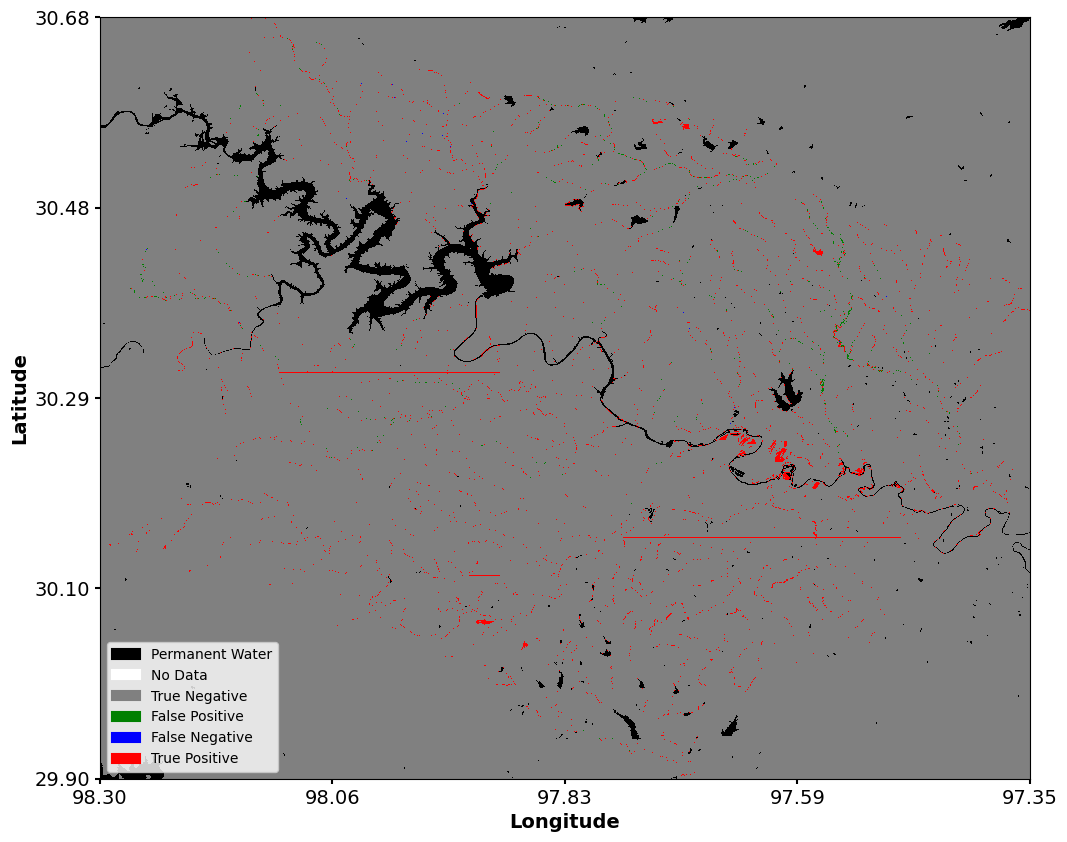

In [4]:
fp.PrintContingencyMap(main_dir, method_name, output_dir)   #All the paths are dynamically called to access the right files

### 5. Plot evaluation metrics

In [5]:
fp.PlotEvaluationMetrics(main_dir, method_name, output_dir)

Performance metrics chart (model_fim_jul4) saved as PNG at /Users/nanaoye/Library/CloudStorage/Box-Box/My Research/CUAHSI/SI_2025/FIM_Evaluation/Outputs/FIM_Evaluation/smallest_extent/FinalPlots/EvaluationMetrics_model_fim_jul4.png
